In [56]:
import pandas as pd
import numpy as np

games = pd.read_csv('data/2020.csv', header=0, error_bad_lines=False).drop([
    'Date', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Notes'
],axis=1)

teams = np.unique(games['Visitor/Neutral'])
assert teams.size == 30

In [47]:
def generate(teams, games):
    graph = pd.DataFrame(np.zeros((teams.size, teams.size)), columns=teams, index=teams)

    for _, game in games.iterrows():
        t1 = game['Visitor/Neutral']
        t2 = game['Home/Neutral']
        if game['PTS'] > game['PTS.1']:
            graph.at[t1, t2] += game['PTS'] / game['PTS.1']
        else:
            graph.at[t2, t1] += game['PTS.1'] / game['PTS']
    return graph

In [49]:
def pagerank(M, labels, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
        v = v / np.linalg.norm(v, 1)
    return pd.Series(v, index=labels, name='pagerank')

In [104]:
data = {}
years = [2015, 2016, 2017, 2018, 2019, 2020]
for year in years:
    games = pd.read_csv(f'data/{year}.csv', header=0, error_bad_lines=False).drop([
        'Date', 'Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Notes'],axis=1)
    graph = generate(teams, games)
    rank = pagerank(graph.to_numpy(), graph.index)
    rank = rank.sort_values(ascending=False)
    data[year] = rank

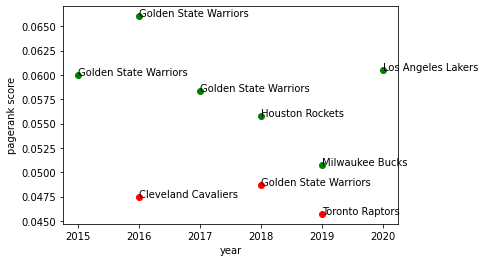

In [144]:
import matplotlib.pyplot as plt
plt.plot(years, [(data[x].max()) for x in data], 'go')
for year in years:
    plt.annotate(data[year].idxmax(), (year, data[year].max()))
plt.plot(2016, data[2016]['Cleveland Cavaliers'], 'ro')
plt.annotate('Cleveland Cavaliers', (2016, data[2016]['Cleveland Cavaliers']))
plt.plot(2018, data[2018]['Golden State Warriors'], 'ro')
plt.annotate('Golden State Warriors', (2018, data[2018]['Golden State Warriors']))
plt.plot(2019, data[2019]['Toronto Raptors'], 'ro')
plt.annotate('Toronto Raptors', (2019, data[2019]['Toronto Raptors']))
plt.ylabel('pagerank score')
plt.xlabel('year')
plt.show()

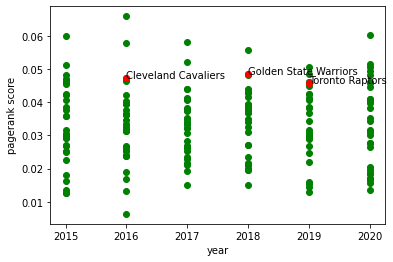

In [145]:
plt.plot(years, [data[x] for x in data], 'go')
plt.plot(2016, data[2016]['Cleveland Cavaliers'], 'ro')
plt.annotate('Cleveland Cavaliers', (2016, data[2016]['Cleveland Cavaliers']))
plt.plot(2018, data[2018]['Golden State Warriors'], 'ro')
plt.annotate('Golden State Warriors', (2018, data[2018]['Golden State Warriors']))
plt.plot(2019, data[2019]['Toronto Raptors'], 'ro')
plt.annotate('Toronto Raptors', (2019, data[2019]['Toronto Raptors']))
plt.ylabel('pagerank score')
plt.xlabel('year')
plt.show()

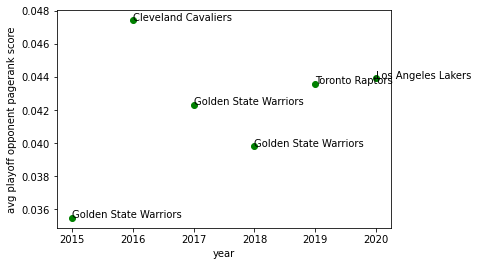

In [187]:
avg_2015 = np.average([data[2015]['Cleveland Cavaliers'], data[2015]['Houston Rockets'], data[2015]['Minnesota Timberwolves'], data[2015]['New Orleans Pelicans']])
plt.annotate('Golden State Warriors', (2015, avg_2015))
avg_2016 = np.average([data[2016]['Golden State Warriors'], data[2016]['Toronto Raptors'], data[2016]['Atlanta Hawks'], data[2016]['Detroit Pistons']])
plt.annotate('Cleveland Cavaliers', (2016, avg_2016))
avg_2017 = np.average([data[2017]['Cleveland Cavaliers'], data[2017]['San Antonio Spurs'], data[2017]['Los Angeles Clippers'], data[2017]['Portland Trail Blazers']])
plt.annotate('Golden State Warriors', (2017, avg_2017))
avg_2018 = np.average([data[2018]['Cleveland Cavaliers'], data[2018]['San Antonio Spurs'], data[2018]['Utah Jazz'], data[2018]['Portland Trail Blazers']])
plt.annotate('Golden State Warriors', (2018, avg_2018))
avg_2019 = np.average([data[2019]['Golden State Warriors'], data[2019]['Milwaukee Bucks'], data[2019]['Philadelphia 76ers'], data[2019]['Orlando Magic']])
plt.annotate('Toronto Raptors', (2019, avg_2019))
avg_2020 = np.average([data[2020]['Miami Heat'], data[2020]['Denver Nuggets'], data[2020]['Houston Rockets'], data[2020]['Portland Trail Blazers']])
plt.annotate('Los Angeles Lakers', (2020, avg_2020))
plt.plot(years, [avg_2015, avg_2016, avg_2017, avg_2018, avg_2019, avg_2020], 'go')

plt.ylabel('avg playoff opponent pagerank score')
plt.xlabel('year')
plt.show()